In this file, will explore how to find the "brightness histogram" for each type of MRI. We are looking for clear humps that can make up a decent GMM model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster

# Load data

In [2]:
sample_flair_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii"
sample_seg_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii"
sample_T1_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii"
sample_T1g_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii"
sample_T2_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii"

In [3]:
data_flair, affine, im = load_nifti(sample_flair_path, return_img=True)

In [4]:
#FOR NOW, CAST AS ARRAY OF INTS (PROBABLY WANT FLOAT32 EVENTUALLY)
data_flair=data_flair.astype(np.int)

In [5]:
data_seg, affine, im = load_nifti(sample_seg_path, return_img=True)
data_seg=data_seg.astype(np.int)

In [6]:
data_T1, affine, im = load_nifti(sample_T1_path, return_img=True)
data_T1=data_T1.astype(np.int)

In [7]:
data_T1g, affine, im = load_nifti(sample_T1g_path, return_img=True)
data_T1g=data_T1g.astype(np.int)

In [8]:
data_T2, affine, im = load_nifti(sample_T2_path, return_img=True)
data_T2=data_T2.astype(np.int)

### Histogram for T1
Want 4 humps - background/CSF, gray matter, white matter, tumor

In [9]:
t1_flat = data_T1.flatten()

In [10]:
t1_flat.reshape(1, len(t1_flat))

memmap([[0, 0, 0, ..., 0, 0, 0]])

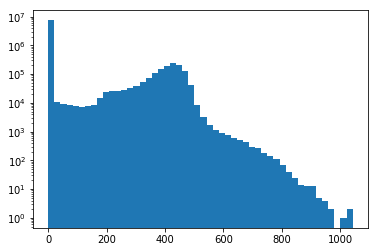

In [11]:
plt.figure()
plt.hist(t1_flat, bins=50, log=True)
plt.show()

Kmeans with k=4

In [12]:
t1_2D = t1_flat.reshape(len(t1_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
t1_kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit_predict(t1_2D)

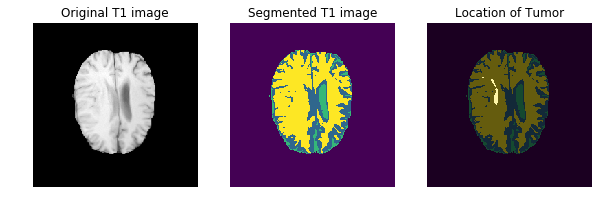

In [13]:
t1_kmeans_brain = t1_kmeans.reshape(240, 240, 155)
plt.figure(figsize=(10,5))
plt.subplot(1,3,1).set_axis_off()
plt.title("Original T1 image")
plt.imshow(data_T1[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented T1 image")
plt.imshow(t1_kmeans_brain[:,:,100].T, origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(t1_kmeans_brain[:,:,100].T, origin='lower')
plt.imshow(data_seg[:,:,100].T, cmap='gray', alpha=0.6, origin='lower')


plt.show()

# Histogram for T2
Want 5 humps: gray matter, white matter, CSF, background, tumor

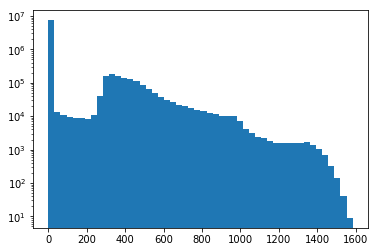

In [14]:
t2_flat = data_T2.flatten()
plt.figure()
plt.hist(t2_flat, bins=50, log=True)
plt.show()

kmeans with k=5

In [15]:
t2_2D = t2_flat.reshape(len(t2_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
t2_kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit_predict(t2_2D)

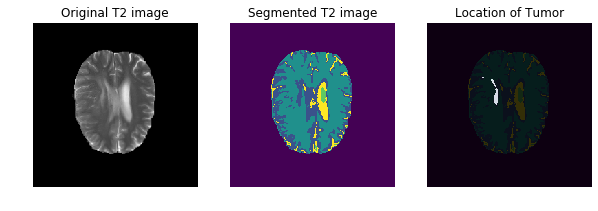

In [16]:
t2_kmeans_brain = t2_kmeans.reshape(240, 240, 155)
plt.figure(figsize=(10,5))

plt.subplot(1,3,1).set_axis_off()
plt.title("Original T2 image")
plt.imshow(data_T2[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented T2 image")
plt.imshow(t2_kmeans_brain[:,:,100].T, origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(t2_kmeans_brain[:,:,100].T, origin='lower')
plt.imshow(data_seg[:,:,100].T, alpha=0.8, cmap='gray', origin='lower')
plt.show()

# Histogram of T1-gad
Want 5 humps: background, grey matter, white matter, blood (non-tumor), tumor

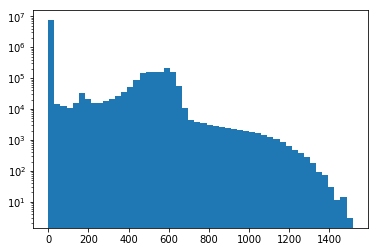

In [17]:
t1g_flat = data_T1g.flatten()
plt.figure()
plt.hist(t1g_flat, bins=50, log=True)
plt.show()

kmeans with 5 humps

In [18]:
t1g_2D = t1g_flat.reshape(len(t1g_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
t1g_kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit_predict(t1g_2D)

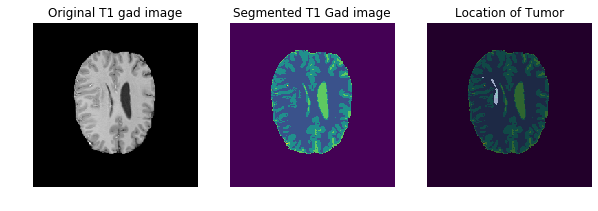

In [19]:
t1g_kmeans_brain = t1g_kmeans.reshape(240, 240, 155)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1).set_axis_off()
plt.title("Original T1 gad image")
plt.imshow(data_T1g[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented T1 Gad image")
plt.imshow(t1g_kmeans_brain[:,:,100].T, origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(t1g_kmeans_brain[:,:,100].T, origin='lower')
plt.imshow(data_seg[:,:,100].T, alpha=0.5, cmap="gray", origin='lower')

plt.show()

# FLAIR histogram
Want 4 humps: background, grey matter, white matter, tumor
"Best" results with 6 humps

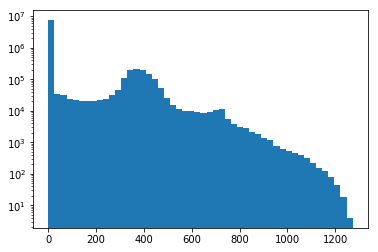

In [20]:
flair_flat = data_flair.flatten()
plt.figure()
plt.hist(flair_flat, bins=50, log=True)
plt.show()

In [21]:
flair_2D = flair_flat.reshape(len(flair_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
flair_kmeans = sklearn.cluster.KMeans(n_clusters=6, random_state=0).fit_predict(flair_2D)

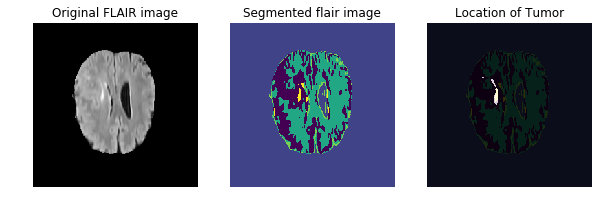

In [22]:
flair_kmeans_brain = flair_kmeans.reshape(240, 240, 155)
plt.figure(figsize=(10,5))

plt.subplot(1,3,1).set_axis_off()
plt.title("Original FLAIR image")
plt.imshow(data_flair[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented flair image")
plt.imshow(flair_kmeans_brain[:,:,100].T,  origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(flair_kmeans_brain[:,:,100].T, origin='lower')
plt.imshow(data_seg[:,:,100].T, alpha=0.8, cmap="gray", origin='lower')
plt.show()

# Test accuracy of FLAIR segmentation
-not bad!

In [23]:
np.unique(flair_kmeans)

array([0, 1, 2, 3, 4, 5], dtype=int32)

Since tumor is brightest spot, likely has value 3

True tumor coordinates

In [24]:
y_coors = np.argwhere(data_seg.flatten()!=0)

In [25]:
tumor_size=len(y_coors)
tumor_size

111724

Predicted tumor coordinates

In [26]:
flair_yhat_coors = np.argwhere(flair_kmeans ==5)
len(flair_yhat_coors)

79818

### True positive

In [27]:
correct_id_tumor = np.intersect1d(y_coors, flair_yhat_coors, assume_unique=True)
len(correct_id_tumor)

48602

In [28]:
percent_tumor_correct = len(correct_id_tumor)/tumor_size
percent_tumor_correct

0.43501843829436826

### False positive

In [29]:
false_positive_points = np.setdiff1d(flair_yhat_coors, y_coors, assume_unique=True)

In [30]:
false_positive = len(false_positive_points)/len(data_seg.flatten())
false_positive

0.003496415770609319

### False Negative

In [31]:
false_neg_points = np.setdiff1d(y_coors, flair_yhat_coors, assume_unique=True)

In [32]:
false_neg = len(false_neg_points)/len(data_seg.flatten())
false_neg

0.007070116487455197

### True Negative

In [ ]:
true_negative=1-(tumor_size+len(false_positive_points))/len(data_seg.flatten())
true_negative

### Total misidentification

In [33]:
total_incorrect_points = np.concatenate((false_neg_points, false_positive_points))

In [34]:
total_error = len(total_incorrect_points)/len(data_seg.flatten())
total_error

0.010566532258064516